<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [1]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

In [2]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [3]:
df_bookings.shape

(134590, 12)

In [4]:
#types of room category
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
#types of booking platform
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
#count of bookings per platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

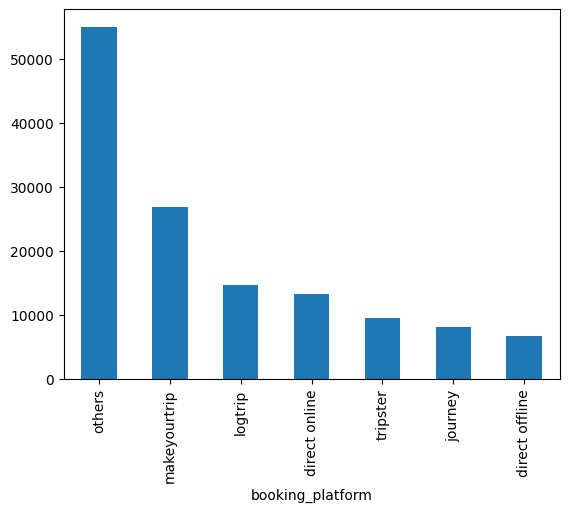

In [7]:
import matplotlib.pyplot as plt
df_bookings.booking_platform.value_counts().plot(kind='bar')
plt.show()

In [8]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [9]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [10]:
df_date = pd.read_csv('datasets/dim_date.csv')

In [11]:
df_date

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday
3,04-05-2022,May-22,W 19,weekeday
4,05-05-2022,May-22,W 19,weekeday
...,...,...,...,...
87,27-07-2022,Jul-22,W 31,weekeday
88,28-07-2022,Jul-22,W 31,weekeday
89,29-07-2022,Jul-22,W 31,weekeday
90,30-07-2022,Jul-22,W 31,weekend


In [12]:
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings= pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [13]:
df_hotels.shape

(25, 4)

In [14]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [15]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

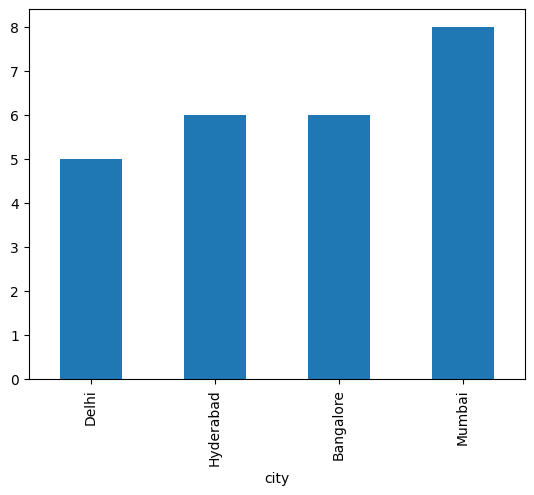

In [16]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

In [17]:
#exploring aggregate bookings
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30.0
1,19562,01-05-2022,RT1,28,30.0
2,19563,01-05-2022,RT1,23,30.0


In [18]:
#unique property ids in aggregate bookings datasets
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [19]:
#total bookings per property_id
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [20]:
#days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-05-2022,RT1,30,19.0
12,16563,01-05-2022,RT1,100,41.0
4136,19558,11-06-2022,RT2,50,39.0
6209,19560,02-07-2022,RT1,123,26.0
8522,19559,25-07-2022,RT1,35,24.0
9194,18563,31-07-2022,RT4,20,18.0


In [21]:
#value of highest capacity
df_agg_bookings.capacity.max()

50.0

In [22]:
#properties that have highest capacity
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-05-2022,RT2,38,50.0
128,17558,02-05-2022,RT2,27,50.0
229,17558,03-05-2022,RT2,26,50.0
328,17558,04-05-2022,RT2,27,50.0
428,17558,05-05-2022,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-07-2022,RT2,22,50.0
8828,17558,28-07-2022,RT2,21,50.0
8928,17558,29-07-2022,RT2,23,50.0
9028,17558,30-07-2022,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [23]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [24]:
#cleaning invalid guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [25]:
#now storing the records other than negative no_guests in same data frame
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [26]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [27]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [28]:
avg, std

(15378.036937686695, 93040.1549314641)

In [29]:
higher_limit = avg + 3*std
higher_limit

294498.50173207896

In [30]:
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [31]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [32]:
df_bookings = df_bookings[df_bookings.revenue_generated < higher_limit]
df_bookings.shape

(134573, 12)

In [33]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [34]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [35]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [36]:
#RT4 room is a luxurious room which is presidential suit so more likely their rent will be higher ...to make a fair analysis we only need to do analysis on RT4 rooms.

In [37]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [38]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [39]:
#mean + 3*standard_deviation
23439+ 3*9048
#since max revenue is less than higher limit outlier so there is no outlier...no data cleaning needed

50583

In [40]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [41]:
#null values in ratings_given are not a big deal as people don't write review easily

In [42]:
# we did data cleaning for no of guests using a business logic that no of guests can't be negative .......then we did data cleaning of revenue generated using statistics which is theree standard deviation..

In [43]:
#Handling null values in aggregate bookings
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [44]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-05-2022,RT1,22,NaN
14,17562,01-05-2022,RT1,12,NaN


In [45]:
df_agg_bookings.capacity.median()

25.0

In [46]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [47]:
df_agg_bookings.loc[[8,15]] 

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-05-2022,RT1,22,25.0
15,17563,01-05-2022,RT1,21,25.0


In [48]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-05-2022,RT1,30,19.0
12,16563,01-05-2022,RT1,100,41.0
4136,19558,11-06-2022,RT2,50,39.0
6209,19560,02-07-2022,RT1,123,26.0
8522,19559,25-07-2022,RT1,35,24.0
9194,18563,31-07-2022,RT4,20,18.0


In [49]:
df_agg_bookings.shape

(9200, 5)

In [50]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

***
### ==> 3. Data Transformation
***

***Creating occupancy percentage column***

In [51]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-05-2022,RT1,25,30.0
1,19562,01-05-2022,RT1,28,30.0
2,19563,01-05-2022,RT1,23,30.0


In [52]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [53]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,0.833333
1,19562,01-05-2022,RT1,28,30.0,0.933333
2,19563,01-05-2022,RT1,23,30.0,0.766667


In [54]:
#Converting to percentage value
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,83.33
1,19562,01-05-2022,RT1,28,30.0,93.33
2,19563,01-05-2022,RT1,23,30.0,76.67


In [55]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [56]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


***
### ==> 4. Insights Generation
***

**1.What is an average occupancy rate in each of the room categories?**

In [57]:
#avg occupancy rate in each of the room categories
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-05-2022,RT1,25,30.0,83.33
1,19562,01-05-2022,RT1,28,30.0,93.33
2,19563,01-05-2022,RT1,23,30.0,76.67


In [58]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [59]:
#Printing room categories such as standard , premium, elite along with average occupancy percentage

In [60]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-05-2022,RT1,25,30.0,83.33,RT1,Standard
1,19562,01-05-2022,RT1,28,30.0,93.33,RT1,Standard
2,19563,01-05-2022,RT1,23,30.0,76.67,RT1,Standard
3,16558,01-05-2022,RT1,18,19.0,94.74,RT1,Standard


In [61]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard
1,19562,01-05-2022,RT1,28,30.0,93.33,Standard
2,19563,01-05-2022,RT1,23,30.0,76.67,Standard
3,16558,01-05-2022,RT1,18,19.0,94.74,Standard


In [62]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

In [63]:
df[df.room_class=="Standard"].occ_pct.mean()

57.88964285714285

**2.Print average occupancy rate per city**

In [64]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [65]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-05-2022,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-05-2022,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [66]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

**3.When was the occupancy better? Weekday or Weekend?**

In [67]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday


In [68]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-05-2022,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend
1,16559,01-05-2022,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend
2,16559,01-05-2022,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-05-2022,May-22,W 19,weekend


In [74]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

**4.In the month of June, what is the occupancy for different cities**

In [75]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type


In [76]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

Series([], Name: occ_pct, dtype: float64)

IndexError: index 0 is out of bounds for axis 0 with size 0

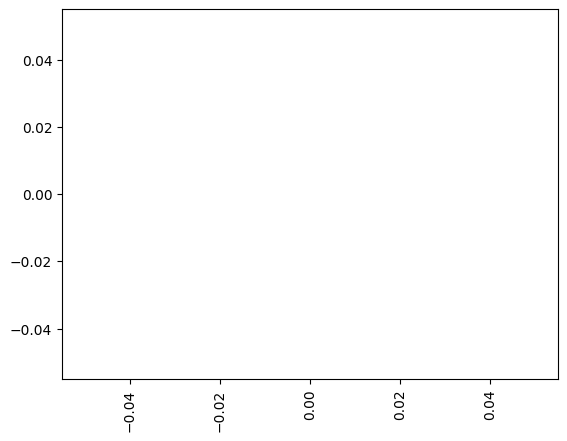

In [77]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5.We got new data for the month of August. Append that to the existing data.**

In [78]:
#Appending new data of august to the existing data
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-08-2022,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-08-2022,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-08-2022,Aug-22,W 32,weekeday,23,30,76.67


In [79]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [80]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [81]:
df_august.shape

(7, 13)

In [82]:
df.shape

(9194, 14)

In [83]:
latest_df = pd.concat([df,df_august], ignore_index= True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9191,16563,31-07-2022,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-07-2022,Jul-22,W 32,weekend,NaN
9192,16563,31-07-2022,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-07-2022,Jul-22,W 32,weekend,NaN
9193,16563,31-07-2022,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-07-2022,Jul-22,W 32,weekend,NaN
9194,16559,01-08-2022,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
9195,19562,01-08-2022,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
9196,19563,01-08-2022,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
9197,19558,01-08-2022,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
9198,19560,01-08-2022,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
9199,17561,01-08-2022,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
9200,17564,01-08-2022,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [84]:
latest_df.shape

(9201, 15)

**6. Revenue Realized Per City**

In [85]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [86]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [87]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [88]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7.Print month by month revenue**

In [89]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-05-2022,May-22,W 19,weekend
1,02-05-2022,May-22,W 19,weekeday
2,03-05-2022,May-22,W 19,weekeday


In [90]:
df_date["mmm yy"].unique()

array(['May-22', 'Jun-22', 'Jul-22'], dtype=object)

In [91]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [92]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [93]:
df_date["date"] = pd.to_datetime(df_date["date"], format="%d-%m-%Y")
print(df_date["date"].head())

0   2022-05-01
1   2022-05-02
2   2022-05-03
3   2022-05-04
4   2022-05-05
Name: date, dtype: datetime64[ns]


In [94]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [96]:
 df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

ValueError: time data "13-05-2022" doesn't match format "%m-%d-%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [179]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [180]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

Series([], Name: revenue_realized, dtype: int64)

In [181]:
#Print revenue realized per hotel type
df_bookings_all.property_name.unique()

array([], dtype=object)

In [182]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

Series([], Name: revenue_realized, dtype: int64)

**Print average rating per city**

In [183]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

Series([], Name: ratings_given, dtype: float64)

**Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

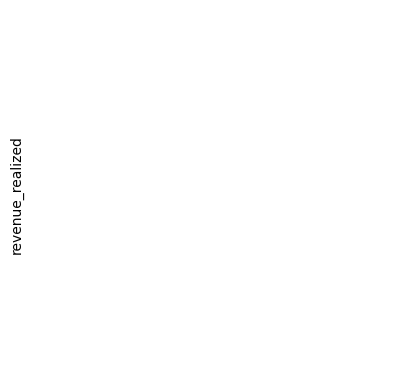

In [185]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")